### Импорт необходимых модулей

In [106]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

### Загрузка набора данных

In [55]:
df = pd.read_csv("Stars.csv")

### Обзор данных

In [58]:
df.head()

,Temperature (K),Luminosity (L/Lo),Radius (R/Ro),Absolute magnitude (Mv),Star type,Star category,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Brown Dwarf,Red,M
1,3042,0.000500,0.1542,16.60,0,Brown Dwarf,Red,M
2,2600,0.000300,0.1020,18.70,0,Brown Dwarf,Red,M
3,2800,0.000200,0.1600,16.65,0,Brown Dwarf,Red,M
4,1939,0.000138,0.1030,20.06,0,Brown Dwarf,Red,M


Temperature(K) - Температура(K).Luminosity(L/Lo)* -Светимость(L/Lo)е.Radius(R/Ro)** Радиус(R/Ro)одAbsolute magnitude(Mv)y**Абсолютная звездная величина(Mv)ниStar typepe*Тип звездыекStar categoryds)Категория звездыунStar colorminЦвета звездыинSpectral ClassmenСпектральный класслаблюдения.

In [61]:
df.shape

(240, 8)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Temperature (K)          240 non-null    int64  
 1   Luminosity (L/Lo)        240 non-null    float64
 2   Radius (R/Ro)            240 non-null    float64
 3   Absolute magnitude (Mv)  240 non-null    float64
 4   Star type                240 non-null    int64  
 5   Star category            240 non-null    object 
 6   Star color               240 non-null    object 
 7   Spectral Class           240 non-null    object 
dtypes: float64(3), int64(2), object(3)
memory usage: 15.1+ KB


Размерность набора данных: 240 наблюдений и 8 признаков. В наборе данных не присутствуют пропущенные значения.

In [66]:
df.dtypes

Temperature (K)              int64
Luminosity (L/Lo)          float64
Radius (R/Ro)              float64
Absolute magnitude (Mv)    float64
Star type                    int64
Star category               object
Star color                  object
Spectral Class              object
dtype: object

In [68]:
# Проверка на пропущенные записи
df.isna().sum()

Temperature (K)            0
Luminosity (L/Lo)          0
Radius (R/Ro)              0
Absolute magnitude (Mv)    0
Star type                  0
Star category              0
Star color                 0
Spectral Class             0
dtype: int64

In [70]:
df.describe()

,Temperature (K),Luminosity (L/Lo),Radius (R/Ro),Absolute magnitude (Mv),Star type
count,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,2.500000
std,9552.425037,179432.244940,517.155763,10.532512,1.711394
min,1939.000000,0.000080,0.008400,-11.920000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,2.500000
75%,15055.500000,198050.000000,42.750000,13.697500,4.000000
max,40000.000000,849420.000000,1948.500000,20.060000,5.000000


In [72]:
df.duplicated().sum()

0

Не имеються аномалий и дубликатов тоже нету.

### Разведочный анализ данных

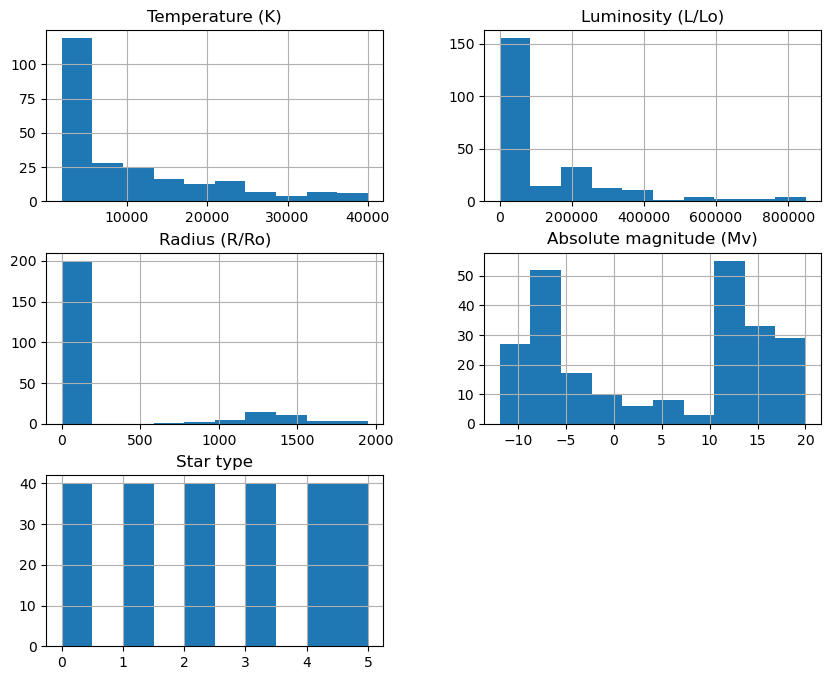

In [76]:
df.hist(figsize=(10,8), bins=10);

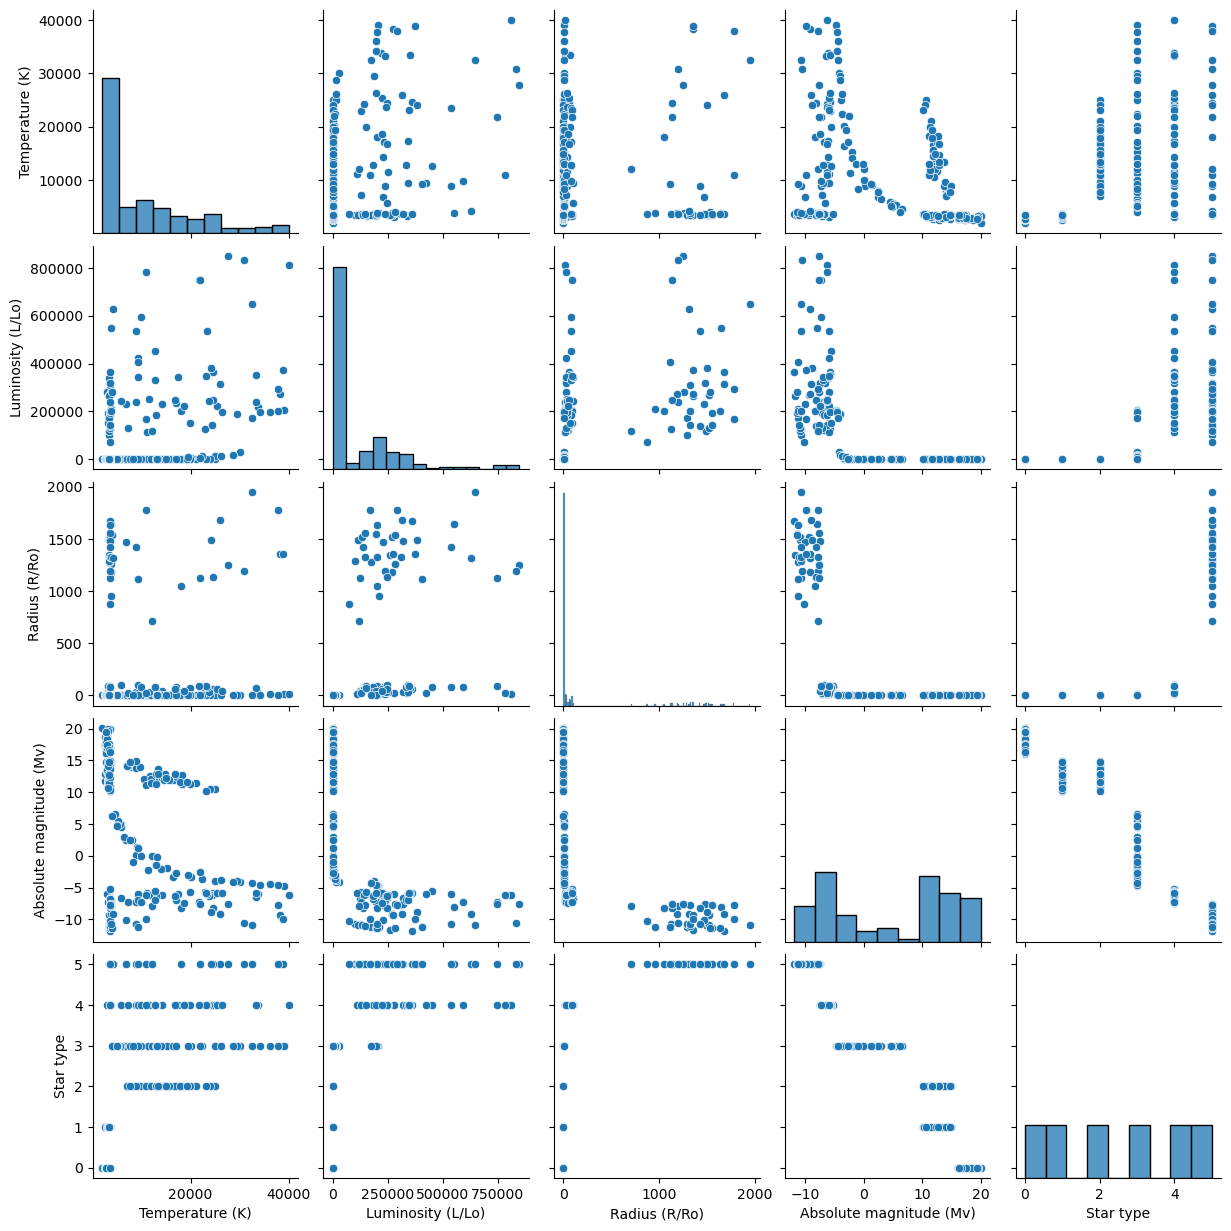

In [78]:
sns.pairplot(data=df[["Temperature (K)", "Luminosity (L/Lo)", "Radius (R/Ro)", "Absolute magnitude (Mv)", "Star type", "Star category", "Star color", "Spectral Class"]])

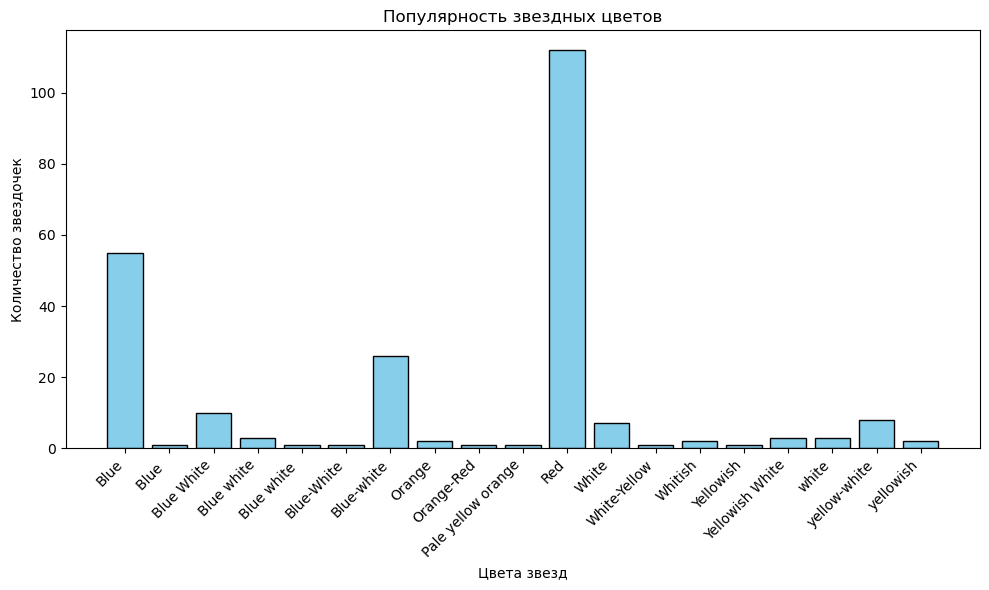

In [79]:
star_colors = df['Star color']
unique_colors, counts = np.unique(star_colors, return_counts=True)
plt.figure(figsize=(10, 6))
plt.bar(unique_colors, counts, color='skyblue', edgecolor='black')
plt.title('Популярность звездных цветов')
plt.xlabel('Цвета звезд')
plt.ylabel('Количество звездочек')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

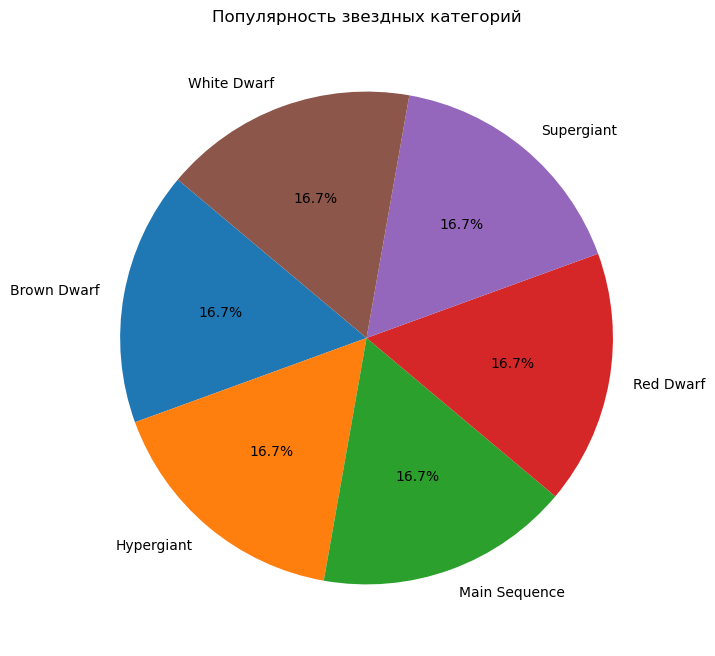

In [80]:
star_categories = df['Star category']
unique_categories, counts = np.unique(star_categories, return_counts=True)
plt.figure(figsize=(10, 8))
plt.pie(counts, labels=unique_categories, autopct='%1.1f%%', startangle=140)
plt.title('Популярность звездных категорий')
plt.show()

<Axes: >

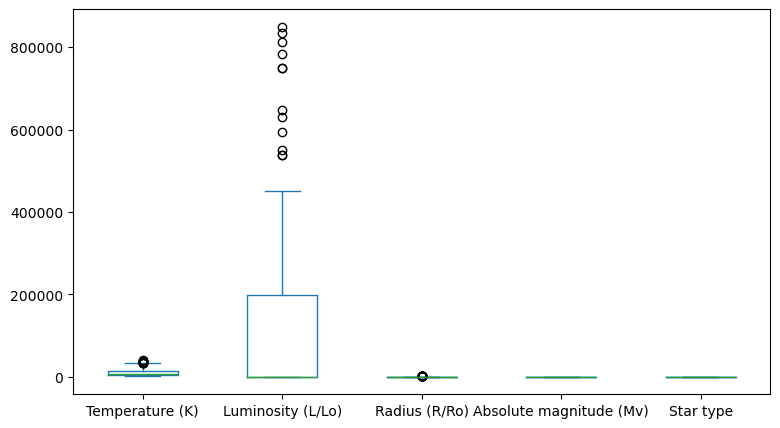

In [81]:
df.plot.box(figsize=(9, 5))

<Axes: >

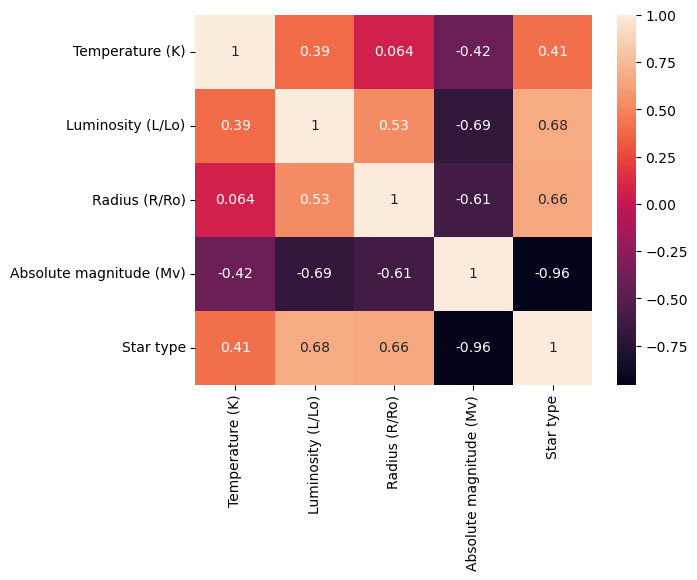

In [82]:
sns.heatmap(df[["Temperature (K)", "Luminosity (L/Lo)", "Radius (R/Ro)", "Absolute magnitude (Mv)", "Star type"]].corr(), annot=True)

Есть небольшая зависимость между Радиусом и Звездным типом.

### Обучение классификатора

In [89]:
df['Star color'] = df['Star color'].astype('category').cat.codes
df['Spectral Class'] = df['Spectral Class'].astype('category').cat.codes

In [91]:
X = df.drop(['Star type', 'Star category'], axis=1)
y = df['Star type']

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [95]:
classifier = DecisionTreeClassifier(random_state=42)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [101]:
y_pred = classifier.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00        11

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48



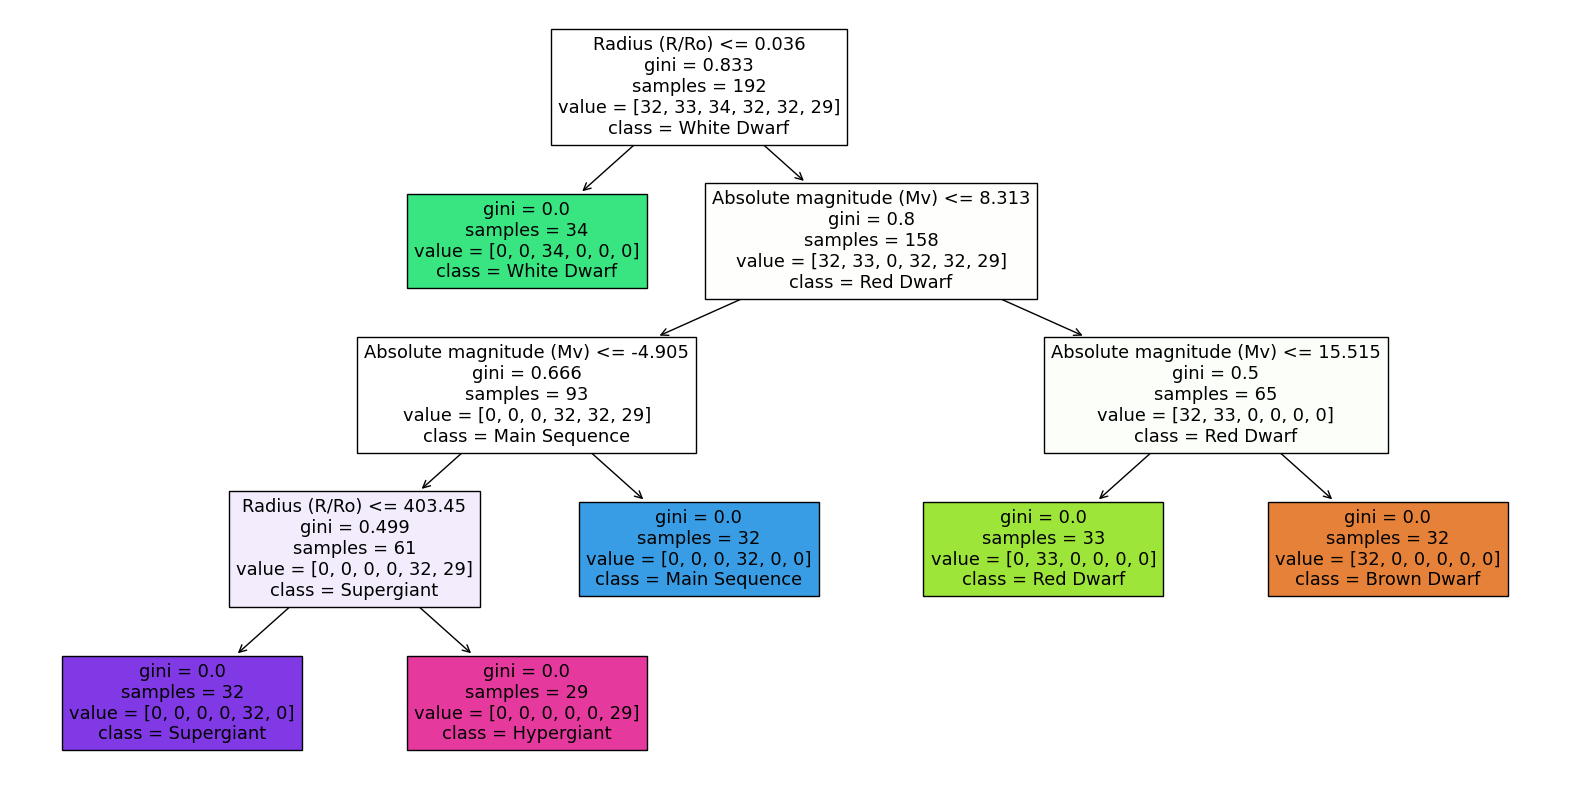

In [103]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(classifier, feature_names=X.columns, class_names=['Brown Dwarf', 'Red Dwarf', 'White Dwarf', 'Main Sequence', 'Supergiant', 'Hypergiant'], filled=True)
plt.show()

In [108]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [110]:
y_pred = rf_classifier.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00        11

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48



In [112]:
feature_importances = rf_classifier.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)

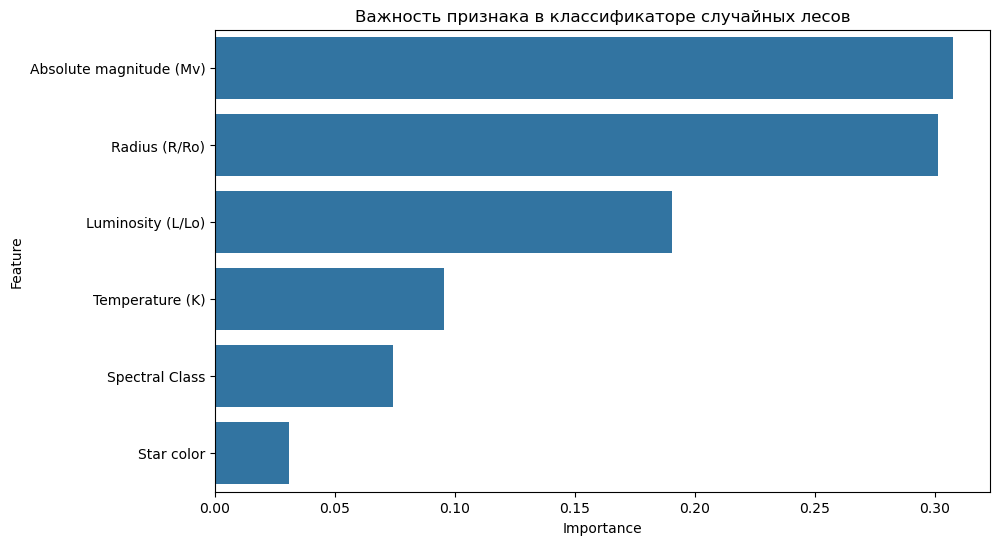

In [120]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Важность признака в классификаторе случайных лесов')
plt.show()